<a href="https://colab.research.google.com/github/PARODBE/MASTER-IA/blob/main/ejercicio_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

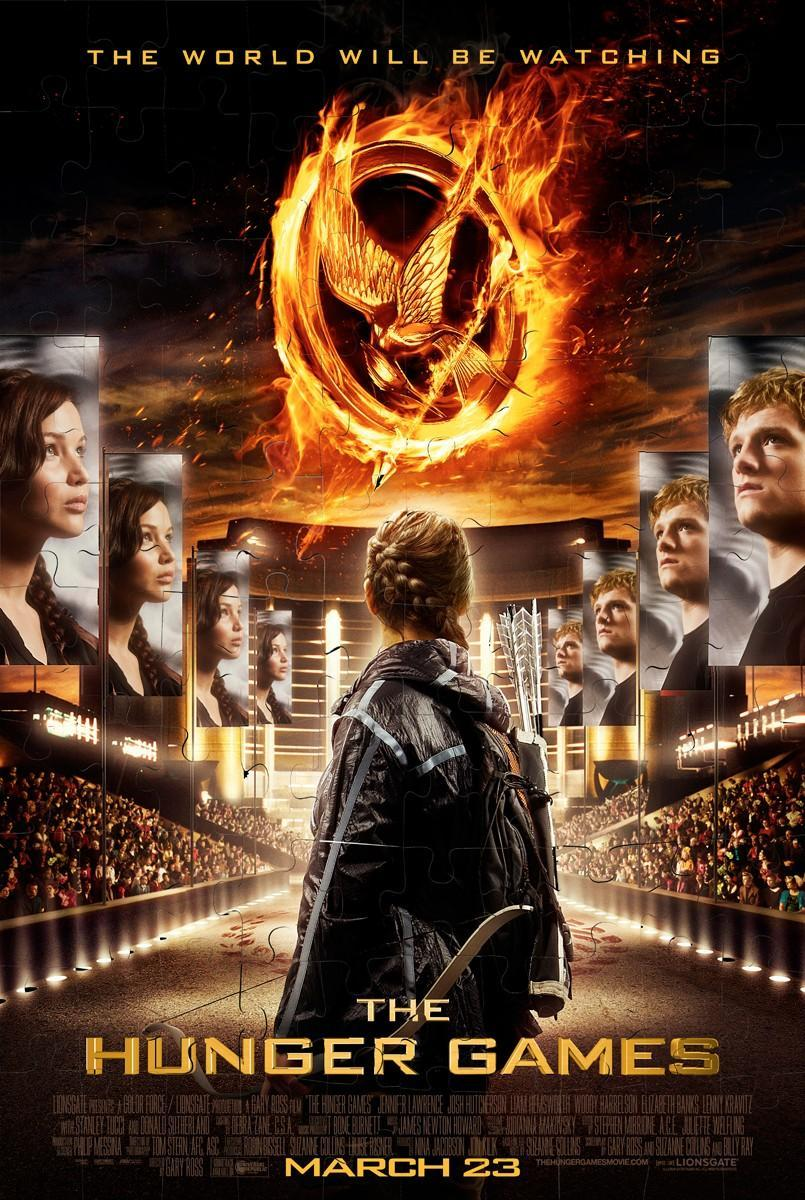

##El Guasones_team está formado por:

- Rafael Peris Gómez
- Borja Ramón Gómez
- Pablo Rodríguez Belenguer

In [1]:
from google.colab import auth
auth.authenticate_user()
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from imblearn.pipeline import Pipeline
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score,precision_score,accuracy_score,recall_score,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,KFold
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '1nKPKl0mx1w_KKbE_91rZ47L9du-XJoym'})#https://drive.google.com/file/d/1YywrCBe6XS-91aSksw5T0QnHVQB-qJey/view?usp=sharing
myfile.GetContentFile('./glass.txt')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv('./glass.txt',index_col=False,names=['refractive_index','sodium','magnesium','aluminum','silicon','potassium','calcium','barium','iron','type_of_glass'])
df.sample(5)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
120,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.0,0.00,2
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
149,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,3
148,1.51670,13.24,3.57,1.38,72.70,0.56,8.44,0.0,0.10,3


In [3]:
target=df.iloc[:,-1]
features=df.columns[:-1].tolist()

In [4]:
print('forma',df.shape)
print('columnas',df.shape)
print('features names',features)
print('Target name',df.iloc[:,-1:].columns)

forma (214, 10)
columnas (214, 10)
features names ['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium', 'barium', 'iron']
Target name Index(['type_of_glass'], dtype='object')


In [5]:
percent=100*df.type_of_glass.value_counts()/df.type_of_glass.size
print('Pesos de cada clase ','\n',percent)

Pesos de cada clase  
 2    35.514019
1    32.710280
7    13.551402
3     7.943925
5     6.074766
6     4.205607
Name: type_of_glass, dtype: float64


In [6]:
from collections import Counter

#target=df.iloc[:,-1]
#counter=Counter(target)

#for k,v in counter.items():
#  perc=100*v/len(target)
#  print('Class=%d, Count=%d, Percent=%d%%'%(k,v,perc))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



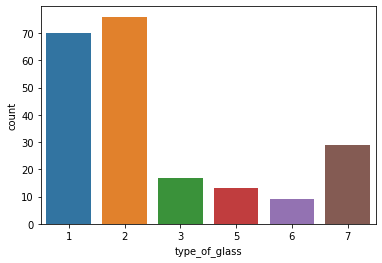

In [7]:
sns.countplot(target)
plt.show()

In [11]:
df.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


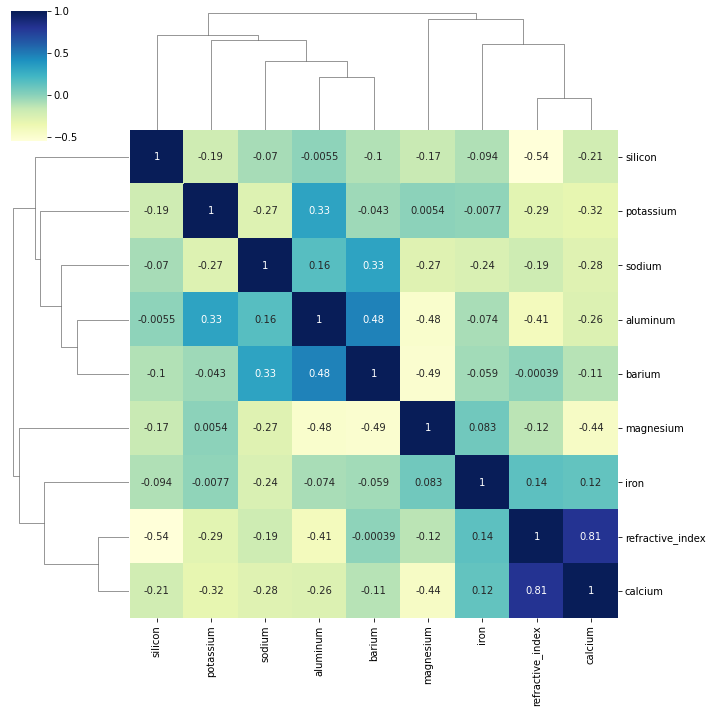

In [12]:
corr=df.iloc[:,:-1].corr()
sns.clustermap(corr,annot=True,cmap="YlGnBu")

Text(0.5, 1.0, 'lm calcium y refractive_index para el total de clases')

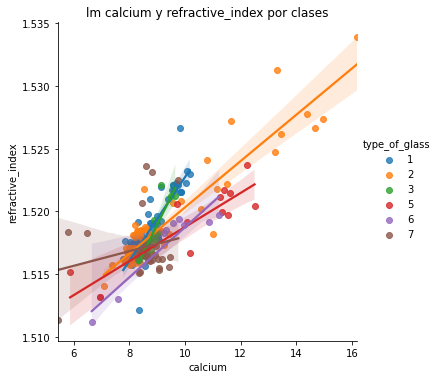

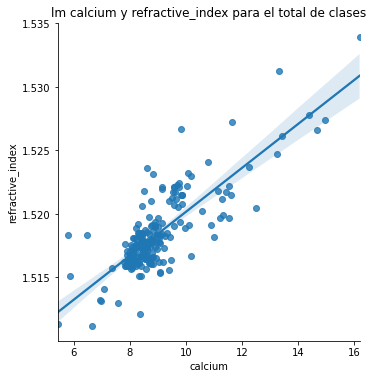

In [14]:
sns.lmplot(x='calcium',y='refractive_index',data=df,hue='type_of_glass')
ax = plt.gca()
ax.set_title("lm calcium y refractive_index por clases")
sns.lmplot(x='calcium',y='refractive_index',data=df)
ax2 = plt.gca()
ax2.set_title("lm calcium y refractive_index para el total de clases")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



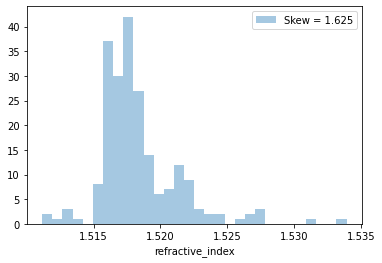

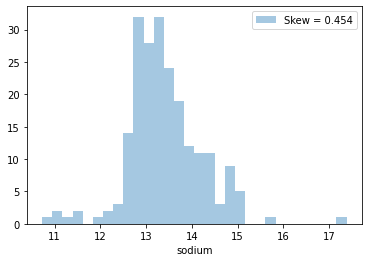

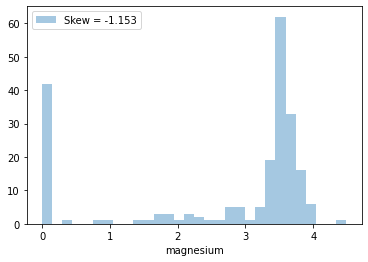

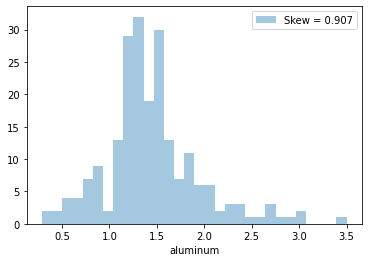

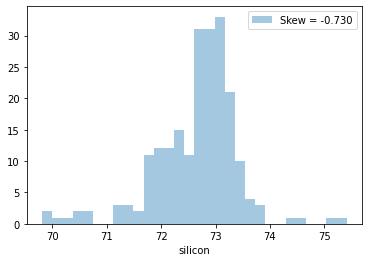

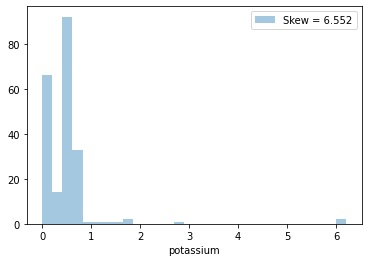

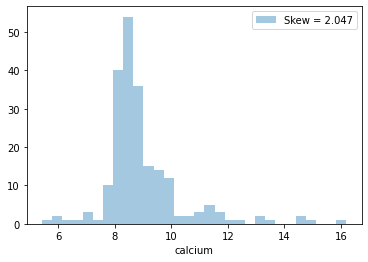

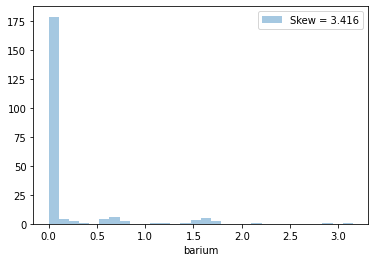

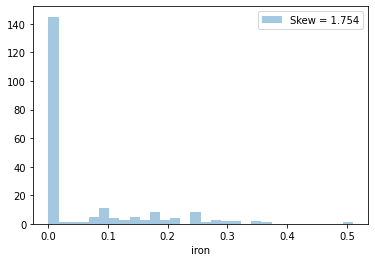

In [15]:
from scipy.stats import skew

for feature in features:
  skew=df[feature].skew()
  sns.distplot(df[feature], kde= False, label='Skew = %.3f' %(skew), bins=30)
  plt.legend(loc='best')
  plt.show()#aquí vamos a tener los datos de Skew para cada feature

In [16]:
for col in df.columns.tolist():
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  data_clean=df[~((df[col] < (Q1-1.5*IQR)) | (df[col] > (Q3+1.5*IQR)))]      
        

In [17]:
df.type_of_glass.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

In [18]:
data_clean.type_of_glass.value_counts()# es evidente que donde estaban los outliers eran en la clase 7

2    76
1    70
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
import random

random.seed(321)

X=data_clean.iloc[:,:-1]
y=data_clean.iloc[:,-1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
params_grid_RF={'criterion':['gini','entropy'],'max_depth':[4,5,8,10,12,16],'min_samples_split':[2,10,15,20],'max_features':['auto','sqrt','log2'],'class_weight':['balanced','balanced_subsample']}
cv_splitter = KFold(n_splits=5, shuffle=False, random_state=None)

In [21]:
random.seed(321)

scores=['balanced_accuracy','f1_micro']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf=GridSearchCV(RandomForestClassifier(),params_grid_RF, cv=cv_splitter, scoring='%s' % score)
    clf.fit(X_train, np.ravel(y_train))

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()

# Tuning hyper-parameters for balanced_accuracy



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificatio

Best parameters set found on development set:

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 16, 'max_features': 'log2', 'min_samples_split': 10}

Grid scores on development set:

# Tuning hyper-parameters for f1_micro

Best parameters set found on development set:

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2}

Grid scores on development set:



In [22]:
clf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2}

In [23]:
random.seed(7)

model_rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,max_features='sqrt',min_samples_split=2,class_weight='balanced')
model_rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy en test: 0.8243243243243243
precision en test: 0.8123700623700624
recall en test: 0.8243243243243243


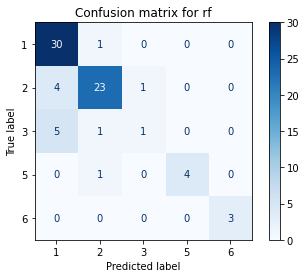

In [24]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix,confusion_matrix,plot_confusion_matrix

confusion_matrix(y_test,model_rf.predict(X_test))
plot_confusion_matrix(model_rf,X_test, y_test, cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion matrix for rf")
print('accuracy en test:',accuracy_score(y_test,model_rf.predict(X_test)))
print('precision en test:',precision_score(y_test,model_rf.predict(X_test),average='weighted'))
print('recall en test:',recall_score(y_test,model_rf.predict(X_test),average='micro'))

In [27]:
random.seed(321)

model_nb=GaussianNB()
model_nb.fit(X_train,np.ravel(y_train))

GaussianNB(priors=None, var_smoothing=1e-09)

0.40540540540540543
0.40540540540540543
0.40540540540540543


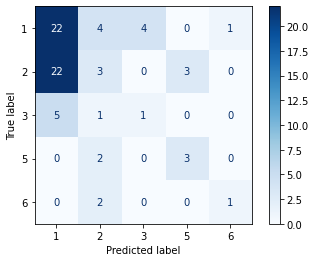

In [34]:
confusion_matrix(y_test,model_nb.predict(X_test))
plot_confusion_matrix(model_nb,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_nb.predict(X_test)))
print(precision_score(y_test,model_nb.predict(X_test),average='micro'))
print(recall_score(y_test,model_nb.predict(X_test),average='micro'))

In [35]:
param_grid_svm={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':[1e-4,1e-3,1e-2]}

In [37]:
from sklearn.svm import SVC

random.seed(321)

scores=['balanced_accuracy','f1_micro']

for score in scores:
  print('Tuneo de hiperparametros para %s'%score)
  print()
  clf_svm=GridSearchCV(SVC(),param_grid=param_grid_svm,scoring='%s'%score,cv=cv_splitter)
  clf_svm.fit(X_train,np.ravel(y_train))

  print()
  print(clf_svm.best_params_)

Tuneo de hiperparametros para balanced_accuracy



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificatio


{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
Tuneo de hiperparametros para f1_micro


{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}


In [38]:
clf_svm.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}

In [39]:
model_svm=SVC(C=1,gamma=0.0001, kernel='linear')
model_svm.fit(X_train,np.ravel(y_train))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.6351351351351351
0.6351351351351351
0.6351351351351351


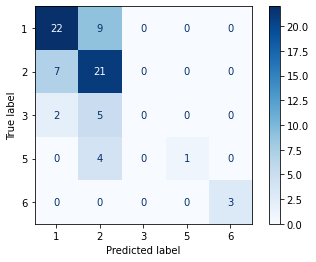

In [43]:
confusion_matrix(y_test,model_svm.predict(X_test))
plot_confusion_matrix(model_svm,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_svm.predict(X_test)))
print(precision_score(y_test,model_svm.predict(X_test),average='micro'))
print(recall_score(y_test,model_svm.predict(X_test),average='micro'))

In [47]:
from imblearn.over_sampling import SMOTE

random.seed(321)

sm = SMOTE(k_neighbors=3,random_state=5)
X_train_res, y_train_res = sm.fit_resample(X_train, np.ravel(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
print(sorted(Counter(y_train_res).items()))

[(1, 46), (2, 46), (3, 46), (5, 46), (6, 46)]


In [50]:
from imblearn.under_sampling import RandomUnderSampler

random.seed(321)

rus=RandomUnderSampler()
X_train_rus,y_train_rus=rus.fit_resample(X_train,np.ravel(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [52]:
model_nb_ov=GaussianNB()
model_nb_ov.fit(X_train_res,np.ravel(y_train_res))
model_nb_us=GaussianNB()
model_nb_us.fit(X_train_rus,np.ravel(y_train_rus))

GaussianNB(priors=None, var_smoothing=1e-09)

0.5
0.6227272727272728
0.5586021505376345


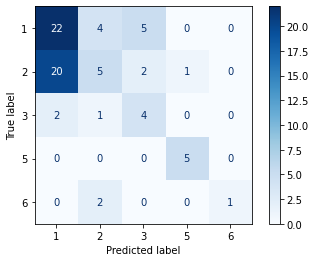

In [60]:
confusion_matrix(y_test,model_nb_ov.predict(X_test))
plot_confusion_matrix(model_nb_ov,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_nb_ov.predict(X_test)))
print(precision_score(y_test,model_nb_ov.predict(X_test),average='macro'))
print(recall_score(y_test,model_nb_ov.predict(X_test),average='macro'))

0.4594594594594595
0.4594594594594595
0.4594594594594595


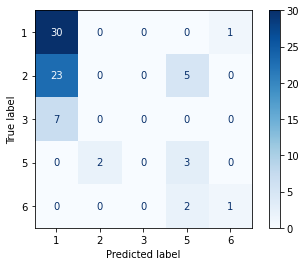

In [63]:
confusion_matrix(y_test,model_nb_us.predict(X_test))
plot_confusion_matrix(model_nb_us,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_nb_us.predict(X_test)))
print(precision_score(y_test,model_nb_us.predict(X_test),average='micro'))
print(recall_score(y_test,model_nb_us.predict(X_test),average='micro'))

In [65]:
scores=['balanced_accuracy','f1_micro']
random.seed(321)

for score in scores:
  print('Tuneo de parametros para el score %s'%score)

  clf_svm_ov=GridSearchCV(SVC(),param_grid=param_grid_svm,cv=cv_splitter,scoring='%s'%score)
  clf_svm_ov.fit(X_train_res,np.ravel(y_train_res))

  print()
  print(clf_svm_ov.best_params_)

Tuneo de parametros para el score balanced_accuracy


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificatio


{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
Tuneo de parametros para el score f1_micro

{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}


In [66]:
clf_svm_ov.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}

In [67]:
model_svm_ov=SVC(C=10,gamma=0.0001,kernel='linear')
model_svm_ov.fit(X_train_res,y_train_res)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.7027027027027027
0.7866666666666667
0.7283870967741936


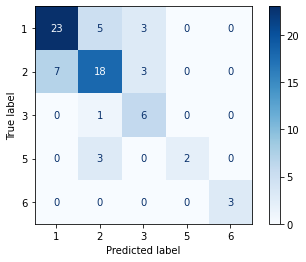

In [70]:
confusion_matrix(y_test,model_svm_ov.predict(X_test))
plot_confusion_matrix(model_svm_ov,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_svm_ov.predict(X_test)))
print(precision_score(y_test,model_svm_ov.predict(X_test),average='macro'))
print(recall_score(y_test,model_svm_ov.predict(X_test),average='macro'))

In [73]:
random.seed(321)

scores=['balanced_accuracy','f1_micro']

for score in scores:
  print('Tuneo de los parámetros para el score %s'%score)
  print()
  clf_svm_us=GridSearchCV(SVC(),param_grid=param_grid_svm,cv=cv_splitter,scoring='%s'%score)
  clf_svm_us.fit(X_train_rus,y_train_rus)
  print()
  print(clf_svm_us.best_params_)

Tuneo de los parámetros para el score balanced_accuracy


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
Tuneo de los parámetros para el score f1_micro



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificatio


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}


In [74]:
model_svm_us=SVC(C=0.1,gamma=0.0001,kernel='linear')
model_svm_us.fit(X_train_rus,y_train_rus)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.3918918918918919
0.600023923444976
0.6910138248847926


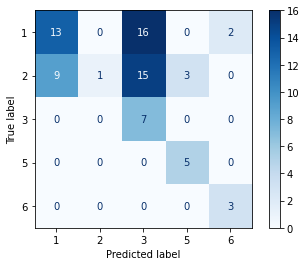

In [76]:
confusion_matrix(y_test,model_svm_us.predict(X_test))
plot_confusion_matrix(model_svm_us,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_svm_us.predict(X_test)))
print(precision_score(y_test,model_svm_us.predict(X_test),average='macro'))
print(recall_score(y_test,model_svm_us.predict(X_test),average='macro'))

In [78]:
grid_xgboost={'colsample_bytree': [0.1,0.5,1,1.5], 'gamma': [1,2,3], 'max_depth':[2,4,6,12,20], 'min_child_weight': [5,10,15]}

In [79]:
random.seed(321)

scores=['balanced_accuracy','f1_micro']

for score in scores:
  print('Tuneo de los parámetros para el score %s'%score)
  print()
  clf_xgb=GridSearchCV(XGBClassifier(),param_grid=grid_xgboost,cv=cv_splitter,scoring='%s'%score)
  clf_xgb.fit(X_train,y_train)
  print()
  print(clf_xgb.best_params_)

Tuneo de los parámetros para el score balanced_accuracy



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 1.5 for Parameter colsample_bytree exceed bound [0,1]





{'colsample_bytree': 1, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 5}
Tuneo de los parámetros para el score f1_micro


{'colsample_bytree': 1, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 5}


In [80]:
clf_xgb.best_params_

{'colsample_bytree': 1, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 5}

In [82]:
model_xgb=XGBClassifier(colsample_bytree=1,gamma=1,max_depth=4,min_child_weight=5)
model_xgb.fit(X_train,np.ravel(y_train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

0.7162162162162162
0.7162162162162162
0.7162162162162162


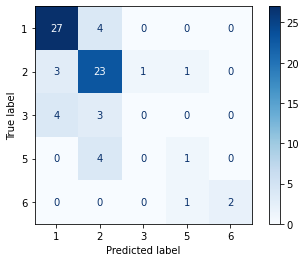

In [86]:
confusion_matrix(y_test,model_xgb.predict(X_test))
plot_confusion_matrix(model_xgb,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_xgb.predict(X_test)))
print(precision_score(y_test,model_xgb.predict(X_test),average='micro'))
print(recall_score(y_test,model_xgb.predict(X_test),average='micro'))

In [87]:
random.seed(321)

scores=['balanced_accuracy','f1_micro']

for score in scores:
  print('Tuneo de los parámetros para el score %s'%score)
  print()
  clf_xgb_ov=GridSearchCV(XGBClassifier(),param_grid=grid_xgboost,cv=cv_splitter,scoring='%s'%score)
  clf_xgb_ov.fit(X_train_res,y_train_res)
  print()
  print(clf_xgb_ov.best_params_)

Tuneo de los parámetros para el score balanced_accuracy



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 1.5 for Parameter colsample_bytree exceed bound [0,1]





{'colsample_bytree': 1, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5}
Tuneo de los parámetros para el score f1_micro


{'colsample_bytree': 1, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5}


In [89]:
clf_xgb_ov.best_params_

{'colsample_bytree': 1, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5}

In [90]:
model_xgb_ov=XGBClassifier(colsample_bytree=1,gamma=1,max_depth=6,min_child_weight=5)
model_xgb_ov.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

0.6891891891891891
0.6891891891891891
0.6891891891891891


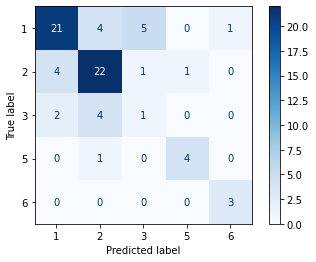

In [93]:
confusion_matrix(y_test,model_xgb_ov.predict(X_test))
plot_confusion_matrix(model_xgb_ov,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_xgb_ov.predict(X_test)))
print(precision_score(y_test,model_xgb_ov.predict(X_test),average='micro'))
print(recall_score(y_test,model_xgb_ov.predict(X_test),average='micro'))

In [94]:
random.seed(321)

scores=['balanced_accuracy','f1_micro']

for score in scores:
  print('Tuneo de los parámetros para el score %s'%score)
  print()
  clf_xgb_us=GridSearchCV(XGBClassifier(),param_grid=grid_xgboost,cv=cv_splitter,scoring='%s'%score)
  clf_xgb_us.fit(X_train_rus,y_train_rus)
  print()
  print(clf_xgb_us.best_params_)

Tuneo de los parámetros para el score balanced_accuracy



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 1.5 for Parameter colsample_bytree exceed bound [0,1]





{'colsample_bytree': 0.1, 'gamma': 1, 'max_depth': 2, 'min_child_weight': 5}
Tuneo de los parámetros para el score f1_micro


{'colsample_bytree': 0.1, 'gamma': 1, 'max_depth': 2, 'min_child_weight': 5}


In [95]:
clf_xgb_us.best_params_

{'colsample_bytree': 0.1, 'gamma': 1, 'max_depth': 2, 'min_child_weight': 5}

In [96]:
model_xgb_us=XGBClassifier(colsample_bytree=0.1,gamma=1,max_depth=2,min_child_weight=5)
model_xgb_us.fit(X_train_rus,y_train_rus)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

0.4189189189189189
0.4189189189189189
0.4189189189189189


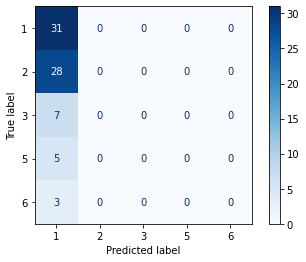

In [100]:
confusion_matrix(y_test,model_xgb_us.predict(X_test))
plot_confusion_matrix(model_xgb_us,X_test,y_test,cmap=plt.cm.Blues,values_format='d')
print(accuracy_score(y_test,model_xgb_us.predict(X_test)))
print(precision_score(y_test,model_xgb_us.predict(X_test),average='micro'))
print(recall_score(y_test,model_xgb_us.predict(X_test),average='micro'))

In [101]:
params_grid_RF_sm={'criterion':['gini','entropy'],'max_depth':[4,5,8,10,12,16],'min_samples_split':[2,10,15,20],'max_features':['auto','sqrt','log2']}
cv_splitter = KFold(n_splits=5, shuffle=False, random_state=None)

In [102]:
random.seed(321)

scores=['balanced_accuracy','f1_micro']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_smote=GridSearchCV(RandomForestClassifier(),params_grid_RF_sm, cv=cv_splitter, scoring='%s' % score)
    clf_smote.fit(X_train_res, np.ravel(y_train_res))

    print("Best parameters set found on development set:")
    print()
    print(clf_smote.best_params_)
    print()
    print("Grid scores on development set:")
    print()

# Tuning hyper-parameters for balanced_accuracy



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificatio

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 2}

Grid scores on development set:

# Tuning hyper-parameters for f1_micro

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 2}

Grid scores on development set:



In [103]:
clf_smote.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 2}

In [104]:
random.seed(321)

model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=8,max_features='auto',min_samples_split=2)
model_rf_smote.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy en test: 0.7837837837837838
precision en test: 0.7837837837837838
recall en test: 0.7827188940092166


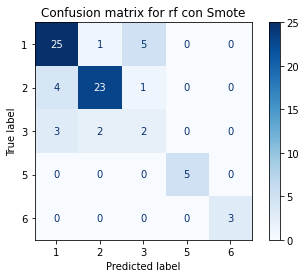

In [105]:
confusion_matrix(y_test,model_rf_smote.predict(X_test))
plot_confusion_matrix(model_rf_smote,X_test, y_test, cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion matrix for rf con Smote")
print('accuracy en test:',accuracy_score(y_test,model_rf_smote.predict(X_test)))
print('precision en test:',precision_score(y_test,model_rf_smote.predict(X_test),average='micro'))
print('recall en test:',recall_score(y_test,model_rf_smote.predict(X_test),average='macro'))

In [106]:
random.seed(321)

scores=['balanced_accuracy','f1_micro']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_rus=GridSearchCV(RandomForestClassifier(),params_grid_RF, cv=cv_splitter, scoring='%s' % score)
    clf_rus.fit(X_train_rus, np.ravel(y_train_rus))

    print("Best parameters set found on development set:")
    print()
    print(clf_rus.best_params_)
    print()

# Tuning hyper-parameters for balanced_accuracy



Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/loc

Best parameters set found on development set:

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2}

# Tuning hyper-parameters for f1_micro

Best parameters set found on development set:

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2}



In [107]:
clf_rus.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 2}

In [108]:
random.seed(321)

model_rf_rus=RandomForestClassifier(class_weight='balanced',criterion='gini',max_depth=4,max_features='auto',min_samples_split=2)
model_rf_rus.fit(X_train_rus,y_train_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy en test: 0.47297297297297297
precision en test: 0.5121219433719433
recall en test: 0.6453917050691244


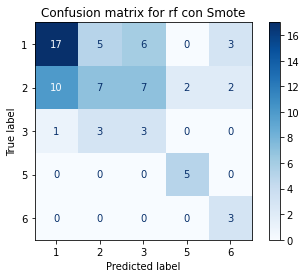

In [113]:
confusion_matrix(y_test,model_rf_rus.predict(X_test))
plot_confusion_matrix(model_rf_rus,X_test, y_test, cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion matrix for rf con Smote")
print('accuracy en test:',accuracy_score(y_test,model_rf_rus.predict(X_test)))
print('precision en test:',precision_score(y_test,model_rf_rus.predict(X_test),average='weighted'))
print('recall en test:',recall_score(y_test,model_rf_rus.predict(X_test),average='macro'))

In [121]:
df_modelos_rf=pd.DataFrame({'Accuracy':[[accuracy_score(y_test,model_rf.predict(X_test))][0],[accuracy_score(y_test,model_rf_smote.predict(X_test))][0],[accuracy_score(y_test,model_rf_rus.predict(X_test))][0],
                                        [accuracy_score(y_test,model_nb.predict(X_test))][0],[accuracy_score(y_test,model_nb_ov.predict(X_test))][0],[accuracy_score(y_test,model_nb_us.predict(X_test))][0],
                                        [accuracy_score(y_test,model_svm.predict(X_test))][0],[accuracy_score(y_test,model_svm_ov.predict(X_test))][0],
                                        [accuracy_score(y_test,model_svm_us.predict(X_test))][0],[accuracy_score(y_test,model_xgb.predict(X_test))][0],[accuracy_score(y_test,model_xgb_ov.predict(X_test))][0],[accuracy_score(y_test,model_xgb_us.predict(X_test))][0]],
                            'Precision':[[precision_score(y_test,model_rf.predict(X_test),average='micro')][0],[precision_score(y_test,model_rf_smote.predict(X_test),average='micro')][0],[precision_score(y_test,model_rf_rus.predict(X_test),average='micro')][0],
                                         [precision_score(y_test,model_nb.predict(X_test),average='micro')][0],[precision_score(y_test,model_nb_ov.predict(X_test),average='macro')][0],[precision_score(y_test,model_nb_us.predict(X_test),average='micro')][0],
                                         [precision_score(y_test,model_svm.predict(X_test),average='micro')][0],[precision_score(y_test,model_svm_ov.predict(X_test),average='macro')][0],[precision_score(y_test,model_svm_us.predict(X_test),average='macro')][0],
                                         [precision_score(y_test,model_xgb.predict(X_test),average='micro')][0],[precision_score(y_test,model_xgb_ov.predict(X_test),average='micro')][0],[precision_score(y_test,model_xgb_us.predict(X_test),average='micro')][0]],
                            'Recall':[[recall_score(y_test,model_rf.predict(X_test),average='micro')][0],[recall_score(y_test,model_rf_smote.predict(X_test),average='macro')][0],[recall_score(y_test,model_rf_rus.predict(X_test),average='micro')][0],
                            [recall_score(y_test,model_nb.predict(X_test),average='micro')][0],[recall_score(y_test,model_nb_ov.predict(X_test),average='macro')][0],[recall_score(y_test,model_nb_us.predict(X_test),average='micro')][0],
                            [recall_score(y_test,model_svm.predict(X_test),average='micro')][0],[recall_score(y_test,model_svm_ov.predict(X_test),average='macro')][0],[recall_score(y_test,model_svm_us.predict(X_test),average='macro')][0],
                            [recall_score(y_test,model_xgb.predict(X_test),average='micro')][0],[recall_score(y_test,model_xgb_ov.predict(X_test),average='micro')][0],[recall_score(y_test,model_xgb_us.predict(X_test),average='micro')][0]],
                            'Best Params':[[clf.best_params_][0],[clf_smote.best_params_][0],[clf_rus.best_params_][0],['-'][0],['-'][0],['-'][0],[clf_svm.best_params_][0],[clf_svm_ov.best_params_][0],[clf_svm_us.best_params_][0],[clf_xgb.best_params_][0],[clf_xgb_ov.best_params_][0],[clf_xgb_us.best_params_][0]]},
                           index=['RF','RF-Smote','RF-UnderSampling','Naive-Bayes','NB-Smote','NB-UnderSampling','SVM','SVM-Smote','SVM-UnderSampling','XGBoost','XGBoost-Smote','Xgboost-UnderSampling'])
df_modelos_rf

,Accuracy,Precision,Recall,Best Params
RF,0.824324,0.824324,0.824324,"{'class_weight': 'balanced', 'criterion': 'ent..."
RF-Smote,0.783784,0.783784,0.782719,"{'criterion': 'gini', 'max_depth': 8, 'max_fea..."
RF-UnderSampling,0.472973,0.472973,0.472973,"{'class_weight': 'balanced', 'criterion': 'gin..."
Naive-Bayes,0.405405,0.405405,0.405405,-
NB-Smote,0.500000,0.622727,0.558602,-
NB-UnderSampling,0.459459,0.459459,0.459459,-
SVM,0.635135,0.635135,0.635135,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}"
SVM-Smote,0.702703,0.786667,0.728387,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}"
SVM-UnderSampling,0.391892,0.600024,0.691014,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}"
XGBoost,0.716216,0.716216,0.716216,"{'colsample_bytree': 1, 'gamma': 1, 'max_depth..."


In [185]:
opciones2={'modelos':df_modelos_rf}

In [180]:
lista=list(modelos.values())

In [181]:
lista[0]

,Accuracy,Precision,Recall,Best Params
RF,0.824324,0.824324,0.824324,"{'class_weight': 'balanced', 'criterion': 'ent..."
RF-Smote,0.783784,0.783784,0.782719,"{'criterion': 'gini', 'max_depth': 8, 'max_fea..."
RF-UnderSampling,0.472973,0.472973,0.472973,"{'class_weight': 'balanced', 'criterion': 'gin..."
Naive-Bayes,0.405405,0.405405,0.405405,-
NB-Smote,0.500000,0.622727,0.558602,-
NB-UnderSampling,0.459459,0.459459,0.459459,-
SVM,0.635135,0.635135,0.635135,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}"
SVM-Smote,0.702703,0.786667,0.728387,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}"
SVM-UnderSampling,0.391892,0.600024,0.691014,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}"
XGBoost,0.716216,0.716216,0.716216,"{'colsample_bytree': 1, 'gamma': 1, 'max_depth..."


In [186]:
with open("modelos.pkl", "wb") as f:
    pickle.dump(opciones2, f)

In [151]:
opciones = {
    "modelo": model_rf,
    'Accuracy':accuracy_score(y_test,model_rf.predict(X_test)),
    'Precision':precision_score(y_test,model_rf.predict(X_test),average='micro'),
    'Recall':recall_score(y_test,model_rf.predict(X_test),average='micro'),
    'X_train':X_train.shape,
    'X_test':X_test.shape,
    "estandarizador": estandarizador}

In [152]:
guasones_team_ml

{'Accuracy': 0.8243243243243243,
 'Precision': 0.8243243243243243,
 'Recall': 0.8243243243243243,
 'X_test': (74, 9),
 'X_train': (111, 9),
 'estandarizador': StandardScaler(copy=True, with_mean=True, with_std=True),
 'modelo': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='entropy', max_depth=10, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)}

In [153]:
import pickle

with open("modelo.pkl", "wb") as f:
    pickle.dump(opciones, f)